# Block Resampling 

This code (instead of calculating hargreaves etc like Block Resampling (Finished)), simply tries to resample a NetCDF file. 

If you want to download this notebook you can use GitHub and [nbviewer](http://nbviewer.jupyter.org/)

### User-Defined Variables 

In [108]:
upperlimit = 0.8 #this method uses quantiles, if this number is 0.9 the top 10% of data will be considered 'extreme' and so on
lowerlimit = 0.2

### Load Necessary Packages

In [109]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import pyeto #install from here (https://github.com/woodcrafty/PyETo), download zip, move to scripts folder in your python
# distribution (/Anaconda/Scripts/PyETo), navigate to this folder in your cmd, type: python setup.py install, restart python
#from pyeto import hargreaves
%matplotlib inline
import matplotlib

#additional NetCDF things: 
import xarray
np.set_printoptions(precision=3, linewidth=100, edgeitems=2)  # make numpy less verbose

### Read in & display climate data

Read in netCDF for Ireland

In [110]:
ds = xarray.open_dataset('E:/Data/EObs/IrelandEObsMonthlyPrecip.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 816)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-31 1950-02-28 1950-03-31 ...
  * longitude  (longitude) float32 -10.875 -10.625 -10.375 -10.125 -9.875 ...
  * latitude   (latitude) float32 51.125 51.375 51.625 51.875 52.125 52.375 ...
Data variables:
    rr         (time, latitude, longitude) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.2 (http://c...
    Conventions:               CF-1.4
    history:                   Tue Jul 10 15:06:02 2018: cdo monsum rr_0.25de...
    Ensembles_ECAD:            17.0
    References:                http://www.ecad.eu\nhttp://www.ecad.eu/downloa...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.6.2 (http://c...

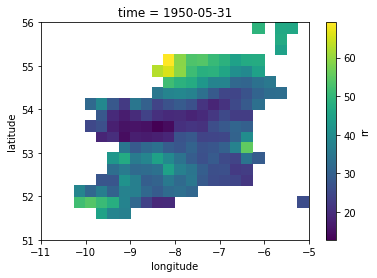

In [111]:
#test to see if it is what it's supposed to be
rain = (ds.rr).isel(time=4)
rain.plot()

In [112]:
#convert to dataframe
df = ds.to_dataframe()
df.head()

#df.to_csv('E:/Temp/dfexplore.csv') #write to csv to explore (optional)

rr
latitude longitude time          
51.125   -10.875   1950-01-31 NaN
                   1950-02-28 NaN
                   1950-03-31 NaN
                   1950-04-30 NaN
                   1950-05-31 NaN

In [113]:
df = df.reset_index()
df.head(n=440)

,latitude,longitude,time,rr
0,51.125,-10.875,1950-01-31,NaN
1,51.125,-10.875,1950-02-28,NaN
2,51.125,-10.875,1950-03-31,NaN
3,51.125,-10.875,1950-04-30,NaN
4,51.125,-10.875,1950-05-31,NaN
5,51.125,-10.875,1950-06-30,NaN
6,51.125,-10.875,1950-07-31,NaN
7,51.125,-10.875,1950-08-31,NaN
8,51.125,-10.875,1950-09-30,NaN
9,51.125,-10.875,1950-10-31,NaN


In [114]:
#convert datetime from unix time to readable date (https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe) 
df['time'] = pd.to_datetime(df['time'],unit='s')
df.head()

,latitude,longitude,time,rr
0,51.125,-10.875,1950-01-31,NaN
1,51.125,-10.875,1950-02-28,NaN
2,51.125,-10.875,1950-03-31,NaN
3,51.125,-10.875,1950-04-30,NaN
4,51.125,-10.875,1950-05-31,NaN


In [115]:
df.tail()

,latitude,longitude,time,rr
391675,55.875,-5.125,2017-08-31,NaN
391676,55.875,-5.125,2017-09-30,NaN
391677,55.875,-5.125,2017-10-31,NaN
391678,55.875,-5.125,2017-11-30,NaN
391679,55.875,-5.125,2017-12-31,NaN


Find start and end year of the data

In [116]:
no_of_years = df['time'].dt.year #creates a variable for the year column
no_of_years = list(no_of_years) #turns it into a list

In [117]:
startyear = no_of_years[0] #gets the first value
print startyear

endyear = no_of_years[-1] #gets the last value
print endyear

1950
2017


Split data into seasons based on months

Winter = 1, Spring = 2, Summer = 3, Autumn = 4

In [118]:
#create a season function to split data into seasons
def get_season(row):
    if row['time'].month >= 3 and row['time'].month <= 5:
        return '2'
    elif row['time'].month >= 6 and row['time'].month <= 8:
        return '3'
    elif row['time'].month >= 9 and row['time'].month <= 11:
        return '4'
    elif row['time'].month <= 2 or row['time'].month >= 12:
        return '1'
    else:
        return '-9999'

Apply the season function to the data

In [119]:
df['Season'] = df.apply(get_season, axis=1)


In [120]:
df.tail()

,latitude,longitude,time,rr,Season
391675,55.875,-5.125,2017-08-31,NaN,3
391676,55.875,-5.125,2017-09-30,NaN,4
391677,55.875,-5.125,2017-10-31,NaN,4
391678,55.875,-5.125,2017-11-30,NaN,4
391679,55.875,-5.125,2017-12-31,NaN,1


Create 'Year' column from the 'date' column

In [121]:
df['Year'] = df['time'].dt.year
df.head()

,latitude,longitude,time,rr,Season,Year
0,51.125,-10.875,1950-01-31,NaN,1,1950
1,51.125,-10.875,1950-02-28,NaN,1,1950
2,51.125,-10.875,1950-03-31,NaN,2,1950
3,51.125,-10.875,1950-04-30,NaN,2,1950
4,51.125,-10.875,1950-05-31,NaN,2,1950


Make December of previous year part of winter for current year (to keep climatolgical year) 

In [122]:
#Redefine the year to attach December of previous year to winter of following year 
#Everywhere the month is '12', the year column gets increased by 1. 
df.loc[df['time'].dt.month == 12, 'Year'] += 1
df.head()

,latitude,longitude,time,rr,Season,Year
0,51.125,-10.875,1950-01-31,NaN,1,1950
1,51.125,-10.875,1950-02-28,NaN,1,1950
2,51.125,-10.875,1950-03-31,NaN,2,1950
3,51.125,-10.875,1950-04-30,NaN,2,1950
4,51.125,-10.875,1950-05-31,NaN,2,1950


Create a new dataframe indexed by Year and Season

In [123]:
#how to multiindex from here: http://stackoverflow.com/questions/33435971/selecting-time-series-data-in-a-specific-sequence-using-pandas/33437422#33437422
df2 = df.set_index(['Year', 'Season'], inplace=False)
df2.head()

latitude  longitude       time  rr
Year Season                                    
1950 1         51.125    -10.875 1950-01-31 NaN
     1         51.125    -10.875 1950-02-28 NaN
     2         51.125    -10.875 1950-03-31 NaN
     2         51.125    -10.875 1950-04-30 NaN
     2         51.125    -10.875 1950-05-31 NaN

# Remove incomplete seasons and apply missing value threshold
Counts the valid days in each season (indicating missing values)

Number of days in:
- 1 (Winter): 90 (91 in Leap Year) 
- 2 (Spring): 92
- 3 (Summer): 92
- 4 (Autumn): 91

In [124]:
count = df2.groupby(level=[0, 1]).count()
count

latitude  longitude  time   rr
Year Season                                
1950 1            960        960   960  364
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1951 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1952 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1953 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1954 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1955 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1956 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1957 1           1440       1440  1440  546
     2           1440       1440  1440  546
...               ...        ...   ...  ...
2010 4           1440       1440  1440  540
2011 1           1440       1440  1440  540
     2           1440       1440  1440  540
     3           1440       1440  1440  540
     4           1440       1440  1440  405
2012 1           1440       1440  1440  540
     2           1440       1440  1440  540
     3           1440       1440  1440  540
     4           1440       1440  1440  540
2013 1           1440       1440  1440  544
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2014 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2015 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2016 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2017 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2018 1            480        480   480  182

[273 rows x 4 columns]

In [125]:
seasoncount = df.reset_index().groupby('Season')['Year'].nunique()
print seasoncount

Season
1    69
2    68
3    68
4    68
Name: Year, dtype: int64


# Temperature Extremes (not used in this precip code)

Calculate mean values for each season

In [126]:
seasmean = df['rr'].groupby(df['Season']).mean()
print seasmean.head() #check the averages - do they seem correct? Yes

Season
1    118.349655
2     81.115150
3     87.457954
4    117.435356
Name: rr, dtype: float32


Calculating differences between each season overall season means

In [127]:
df2['seasdif'] = df2['rr'].groupby(level=['Year','Season']).mean() - seasmean #creates an anomaly column
seasdif = df2['rr'].groupby(level=['Year','Season']).mean() - seasmean #creates a series
seasdif

Year  Season
1950  1         -3.716682
      2        -16.306358
      3         41.336739
      4         15.939552
1951  1         -5.816689
      2        -11.175591
      3          4.902855
      4         -6.595978
1952  1          4.709320
      2        -14.868080
      3        -19.300995
      4        -19.320335
1953  1        -41.604416
      2        -26.468628
      3         16.138565
      4         -3.009895
1954  1         -9.296906
      2          5.175323
      3          6.673180
      4         53.720329
1955  1          5.170128
      2         -6.222839
      3        -22.167297
      4        -29.034439
1956  1        -18.720535
      2        -20.827785
      3         36.926666
      4        -20.210815
1957  1         22.716461
      2         -4.110573
                  ...    
2010  4         -0.641838
2011  1        -34.903725
      2        -17.121815
      3        -17.582954
      4         23.705635
2012  1        -21.829468
      2        -29.909966

# Rainfall Extremes

Calculate sum values for each season

In [128]:
rainsum = df['rr'].groupby(df['Season']).sum() / seasoncount #seasonal sums divided by number of years to get baseline rainfall
print rainsum #checked this in Excel, the division is correct

Season
1    63658.391304
2    44249.507353
3    47728.889706
4    63855.477941
dtype: float64


In [129]:
raindif = df2['rr'].groupby(level=['Year','Season']).sum() - rainsum #work out the anomalies
raindif

Year  Season
1950  1        -21931.988961
      2         -8863.905790
      3         22593.008732
      4          8967.225184
1951  1         -2215.391304
      2         -6062.507353
      3          2700.110294
      4         -3337.177160
1952  1          3531.811821
      2         -8078.605009
      3        -10515.190487
      4        -10284.677160
1953  1        -21755.488961
      2        -14412.507353
      3          8834.809513
      4         -1379.177160
1954  1         -4115.590523
      2          2865.094210
      3          3666.711857
      4         29595.522059
1955  1          3783.413383
      2         -3358.308134
      3        -12080.190487
      4        -15588.575597
1956  1         -9260.891304
      2        -11332.605009
      3         20185.110294
      4        -10770.876379
1957  1         13363.710258
      2         -2205.007353
                    ...     
2010  4          -786.977941
2011  1        -18597.590523
      2         -9693.105009
 

# Extracting extreme seasons

Create a copy of the dataframe and two blank lists for hot and cold extremes

In [130]:
seasdif2 = pd.DataFrame(seasdif)
raindif2 = pd.DataFrame(raindif)
warm = []
cold = []
seasdif2['rain'] = raindif2[0] #add the rain anomaly column to seasdif2
seasdif2

rr          rain
Year Season                         
1950 1       -3.716682 -21931.988961
     2      -16.306358  -8863.905790
     3       41.336739  22593.008732
     4       15.939552   8967.225184
1951 1       -5.816689  -2215.391304
     2      -11.175591  -6062.507353
     3        4.902855   2700.110294
     4       -6.595978  -3337.177160
1952 1        4.709320   3531.811821
     2      -14.868080  -8078.605009
     3      -19.300995 -10515.190487
     4      -19.320335 -10284.677160
1953 1      -41.604416 -21755.488961
     2      -26.468628 -14412.507353
     3       16.138565   8834.809513
     4       -3.009895  -1379.177160
1954 1       -9.296906  -4115.590523
     2        5.175323   2865.094210
     3        6.673180   3666.711857
     4       53.720329  29595.522059
1955 1        5.170128   3783.413383
     2       -6.222839  -3358.308134
     3      -22.167297 -12080.190487
     4      -29.034439 -15588.575597
1956 1      -18.720535  -9260.891304
     2      -20.827785 -11332.605009
     3       36.926666  20185.110294
     4      -20.210815 -10770.876379
1957 1       22.716461  13363.710258
     2       -4.110573  -2205.007353
...                ...           ...
2010 4       -0.641838   -786.977941
2011 1      -34.903725 -18597.590523
     2      -17.121815  -9693.105009
     3      -17.582954  -9996.389706
     4       23.705635  -6693.376379
2012 1      -21.829468 -11537.488961
     2      -29.909966 -16598.706572
     3       41.549828  21935.313419
     4      -20.775909 -11659.376379
2013 1       -5.574287  -2308.590523
     2        3.854813   2144.094210
     3      -15.246597  -8301.487362
     4      -15.859894  -8395.278722
2014 1       83.372330  46481.811821
     2        6.932472   3824.492647
     3       -5.331581  -2887.889706
     4       -7.919418  -4059.778722
2015 1        9.633499   6220.413383
     2       22.661957  12412.793428
     3        8.334358   4573.711857
     4       -1.937553   -793.677160
2016 1       93.068115  51775.710258
     2       -6.769180  -3656.605009
     3        4.771355   2628.309513
     4      -35.199455 -18954.677160
2017 1      -30.493423 -15688.891304
     2       -7.736946  -4185.007353
     3       20.493149  11212.411075
     4       11.979668   6805.123621
2018 1        4.105293 -41371.590523

[273 rows x 2 columns]

### [Quantiles/ Percentiles](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
(works in the same was as [numpy.percentile](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html))

In [131]:
#seasdif2['warm'] = 0 #add a blank column for warm
#seasdif2['cold'] = 0 #add a blank column for cold
seasdif2['wet'] =  0 #add a blank column for wet
seasdif2['dry'] = 0 #add a blank column for dry

In [132]:
#seasdif2.loc[seasdif2['tg'] > seasdif2['tg'].quantile(upperlimit), 'warm'] = 1 # adds 1 for hot percentile
#seasdif2.loc[seasdif2['tg'] < seasdif2['tg'].quantile(lowerlimit), 'cold'] = 1 # adds 1 for cold percentile 

seasdif2.loc[seasdif2['rr'] > seasdif2['rr'].quantile(upperlimit), 'wet'] = 1 #adds a 1 for wet percentile
seasdif2.loc[seasdif2['rr'] < seasdif2['rr'].quantile(lowerlimit), 'dry'] = 1 #adds a 1 for dry percentile

seasdif2

rr          rain  wet  dry
Year Season                                   
1950 1       -3.716682 -21931.988961    0    0
     2      -16.306358  -8863.905790    0    0
     3       41.336739  22593.008732    1    0
     4       15.939552   8967.225184    0    0
1951 1       -5.816689  -2215.391304    0    0
     2      -11.175591  -6062.507353    0    0
     3        4.902855   2700.110294    0    0
     4       -6.595978  -3337.177160    0    0
1952 1        4.709320   3531.811821    0    0
     2      -14.868080  -8078.605009    0    0
     3      -19.300995 -10515.190487    0    0
     4      -19.320335 -10284.677160    0    0
1953 1      -41.604416 -21755.488961    0    1
     2      -26.468628 -14412.507353    0    1
     3       16.138565   8834.809513    0    0
     4       -3.009895  -1379.177160    0    0
1954 1       -9.296906  -4115.590523    0    0
     2        5.175323   2865.094210    0    0
     3        6.673180   3666.711857    0    0
     4       53.720329  29595.522059    1    0
1955 1        5.170128   3783.413383    0    0
     2       -6.222839  -3358.308134    0    0
     3      -22.167297 -12080.190487    0    1
     4      -29.034439 -15588.575597    0    1
1956 1      -18.720535  -9260.891304    0    0
     2      -20.827785 -11332.605009    0    1
     3       36.926666  20185.110294    1    0
     4      -20.210815 -10770.876379    0    1
1957 1       22.716461  13363.710258    1    0
     2       -4.110573  -2205.007353    0    0
...                ...           ...  ...  ...
2010 4       -0.641838   -786.977941    0    0
2011 1      -34.903725 -18597.590523    0    1
     2      -17.121815  -9693.105009    0    0
     3      -17.582954  -9996.389706    0    0
     4       23.705635  -6693.376379    1    0
2012 1      -21.829468 -11537.488961    0    1
     2      -29.909966 -16598.706572    0    1
     3       41.549828  21935.313419    1    0
     4      -20.775909 -11659.376379    0    1
2013 1       -5.574287  -2308.590523    0    0
     2        3.854813   2144.094210    0    0
     3      -15.246597  -8301.487362    0    0
     4      -15.859894  -8395.278722    0    0
2014 1       83.372330  46481.811821    1    0
     2        6.932472   3824.492647    0    0
     3       -5.331581  -2887.889706    0    0
     4       -7.919418  -4059.778722    0    0
2015 1        9.633499   6220.413383    0    0
     2       22.661957  12412.793428    1    0
     3        8.334358   4573.711857    0    0
     4       -1.937553   -793.677160    0    0
2016 1       93.068115  51775.710258    1    0
     2       -6.769180  -3656.605009    0    0
     3        4.771355   2628.309513    0    0
     4      -35.199455 -18954.677160    0    1
2017 1      -30.493423 -15688.891304    0    1
     2       -7.736946  -4185.007353    0    0
     3       20.493149  11212.411075    1    0
     4       11.979668   6805.123621    0    0
2018 1        4.105293 -41371.590523    0    0

[273 rows x 4 columns]

In [133]:
extremecount = seasdif2[['wet','dry']]
extremecount

wet  dry
Year Season          
1950 1         0    0
     2         0    0
     3         1    0
     4         0    0
1951 1         0    0
     2         0    0
     3         0    0
     4         0    0
1952 1         0    0
     2         0    0
     3         0    0
     4         0    0
1953 1         0    1
     2         0    1
     3         0    0
     4         0    0
1954 1         0    0
     2         0    0
     3         0    0
     4         1    0
1955 1         0    0
     2         0    0
     3         0    1
     4         0    1
1956 1         0    0
     2         0    1
     3         1    0
     4         0    1
1957 1         1    0
     2         0    0
...          ...  ...
2010 4         0    0
2011 1         0    1
     2         0    0
     3         0    0
     4         1    0
2012 1         0    1
     2         0    1
     3         1    0
     4         0    1
2013 1         0    0
     2         0    0
     3         0    0
     4         0    0
2014 1         1    0
     2         0    0
     3         0    0
     4         0    0
2015 1         0    0
     2         1    0
     3         0    0
     4         0    0
2016 1         1    0
     2         0    0
     3         0    0
     4         0    1
2017 1         0    1
     2         0    0
     3         1    0
     4         0    0
2018 1         0    0

[273 rows x 2 columns]

### Select out combinations of extremes (warm/wet, warm/dry, cold/wet, cold/dry)

In [134]:
#identify columns with  extremes
extremeseasons = seasdif2.loc[(seasdif2.wet==1) | (seasdif2.dry==1)]
extremeseasons

rr          rain  wet  dry
Year Season                                   
1950 3       41.336739  22593.008732    1    0
1953 1      -41.604416 -21755.488961    0    1
     2      -26.468628 -14412.507353    0    1
1954 4       53.720329  29595.522059    1    0
1955 3      -22.167297 -12080.190487    0    1
     4      -29.034439 -15588.575597    0    1
1956 2      -20.827785 -11332.605009    0    1
     3       36.926666  20185.110294    1    0
     4      -20.210815 -10770.876379    0    1
1957 1       22.716461  13363.710258    1    0
1958 3       44.337105  24231.211857    1    0
     4      -19.864105 -10581.575597    0    1
1959 1      -31.008446 -15970.090523    0    1
     3      -25.559052 -13932.088925    0    1
1960 1       31.378738  18093.311821    1    0
     3       33.606880  18372.508732    1    0
     4       23.818123  13268.920496    1    0
1961 1       23.803833  13957.413383    1    0
1963 1      -48.767418 -25666.488961    0    1
     2       24.816719  13589.293428    1    0
1964 1      -60.462292 -32051.891304    0    1
1965 3       19.650475  10752.309513    1    0
1966 1       38.433502  21945.210258    1    0
     2       25.447670  13933.793428    1    0
1967 4       29.430031  16333.022059    1    0
1968 1      -26.821449 -13683.988961    0    1
     3      -22.487442 -12254.987362    0    1
     4       25.987541  14453.420496    1    0
1969 3      -28.428101 -15498.588925    0    1
     4      -32.362274 -17405.575597    0    1
...                ...           ...  ...  ...
2001 4      -33.008980 -17758.677160    0    1
2003 1      -35.716324 -18540.590523    0    1
     4      -33.370705 -17956.177160    0    1
2004 1      -32.253502 -16649.891304    0    1
2005 1      -21.541779 -10801.289742    0    1
     3      -26.069859 -14210.987362    0    1
2006 1      -50.233719 -26467.090523    0    1
     3      -33.492386 -18263.688534    0    1
     4       37.404396  20687.022059    1    0
2007 1       30.602173  17669.311821    1    0
     3       35.820435  19581.110294    1    0
     4      -44.270889 -23907.677160    0    1
2008 1       26.677643  15526.507133    1    0
     3       51.777214  28293.508732    1    0
2009 1      -20.475479 -10219.090523    0    1
     3       47.185265  25786.313419    1    0
     4       35.855675  19841.420496    1    0
2010 1      -41.995628 -21969.090523    0    1
2011 1      -34.903725 -18597.590523    0    1
     4       23.705635  -6693.376379    1    0
2012 1      -21.829468 -11537.488961    0    1
     2      -29.909966 -16598.706572    0    1
     3       41.549828  21935.313419    1    0
     4      -20.775909 -11659.376379    0    1
2014 1       83.372330  46481.811821    1    0
2015 2       22.661957  12412.793428    1    0
2016 1       93.068115  51775.710258    1    0
     4      -35.199455 -18954.677160    0    1
2017 1      -30.493423 -15688.891304    0    1
     3       20.493149  11212.411075    1    0

[110 rows x 4 columns]

Examine the frequency of extremes, are warm summers increasing? Are cold winters decreasing?

In [135]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

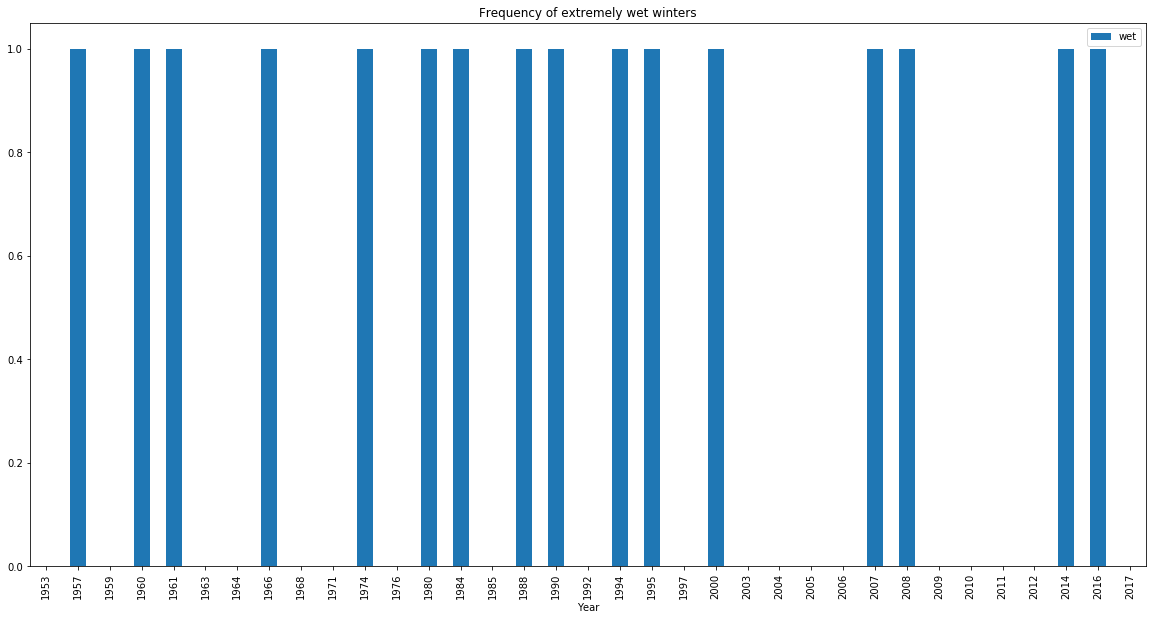

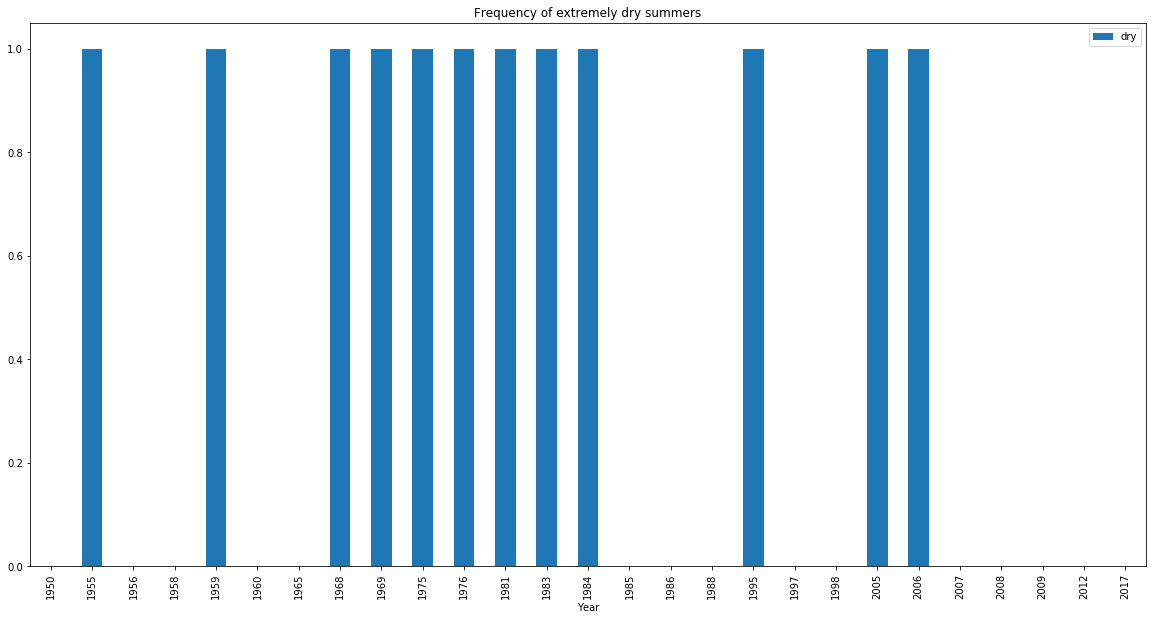

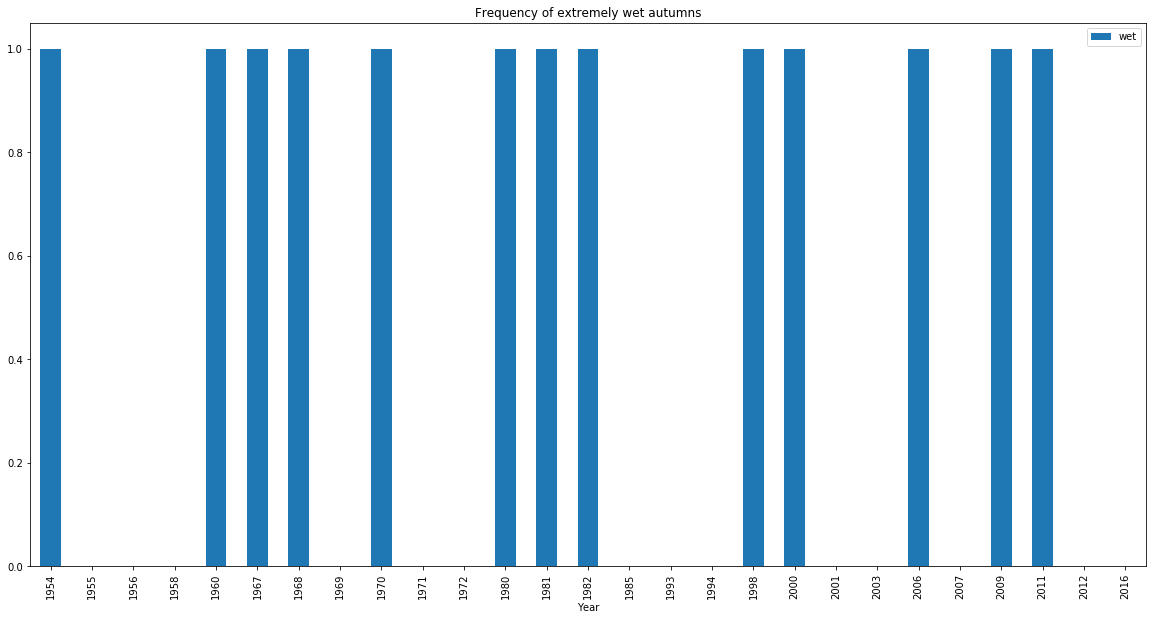

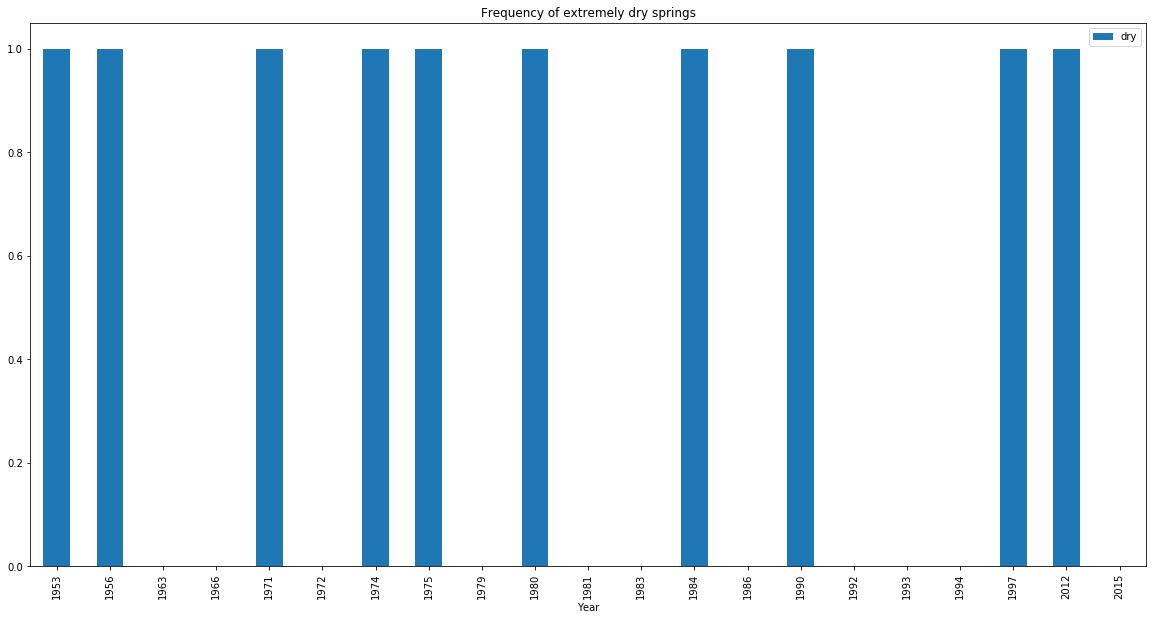

In [136]:
extremewinters = extremeseasons.xs('1', level='Season')
extremesprings = extremeseasons.xs('2', level='Season')
extremesummers = extremeseasons.xs('3', level='Season')
extremeautumns = extremeseasons.xs('4', level='Season')
extremewinters[['wet']].plot(kind='bar', title = 'Frequency of extremely wet winters')
extremesummers[['dry']].plot(kind='bar', title = 'Frequency of extremely dry summers')
extremeautumns[['wet']].plot(kind='bar', title = 'Frequency of extremely wet autumns')
extremesprings[['dry']].plot(kind='bar', title = 'Frequency of extremely dry springs')

Create new index for extremes

In [137]:
df2.index.tolist()

[(1950L, '1'),
 (1950L, '1'),
 (1950L, '2'),
 (1950L, '2'),
 (1950L, '2'),
 (1950L, '3'),
 (1950L, '3'),
 (1950L, '3'),
 (1950L, '4'),
 (1950L, '4'),
 (1950L, '4'),
 (1951L, '1'),
 (1951L, '1'),
 (1951L, '1'),
 (1951L, '2'),
 (1951L, '2'),
 (1951L, '2'),
 (1951L, '3'),
 (1951L, '3'),
 (1951L, '3'),
 (1951L, '4'),
 (1951L, '4'),
 (1951L, '4'),
 (1952L, '1'),
 (1952L, '1'),
 (1952L, '1'),
 (1952L, '2'),
 (1952L, '2'),
 (1952L, '2'),
 (1952L, '3'),
 (1952L, '3'),
 (1952L, '3'),
 (1952L, '4'),
 (1952L, '4'),
 (1952L, '4'),
 (1953L, '1'),
 (1953L, '1'),
 (1953L, '1'),
 (1953L, '2'),
 (1953L, '2'),
 (1953L, '2'),
 (1953L, '3'),
 (1953L, '3'),
 (1953L, '3'),
 (1953L, '4'),
 (1953L, '4'),
 (1953L, '4'),
 (1954L, '1'),
 (1954L, '1'),
 (1954L, '1'),
 (1954L, '2'),
 (1954L, '2'),
 (1954L, '2'),
 (1954L, '3'),
 (1954L, '3'),
 (1954L, '3'),
 (1954L, '4'),
 (1954L, '4'),
 (1954L, '4'),
 (1955L, '1'),
 (1955L, '1'),
 (1955L, '1'),
 (1955L, '2'),
 (1955L, '2'),
 (1955L, '2'),
 (1955L, '3'),
 (1955L, '

Count extreme values in each year

In [138]:
extremecount = seasdif2.groupby(level=[0]).sum()
extremecount.drop(extremecount.columns[[0]], axis=1, inplace=True)
extremecount

,rain,wet,dry
Year,,,
1950,764.339164,1,0
1951,-8914.965523,0,0
1952,-25346.660836,0,0
1953,-28712.363961,0,2
1954,32011.737602,1,0
1955,-27243.660836,0,2
1956,-11179.262398,1,2
1957,9376.538383,1,0
1958,20631.940727,1,1


## Plot frequency of extremes

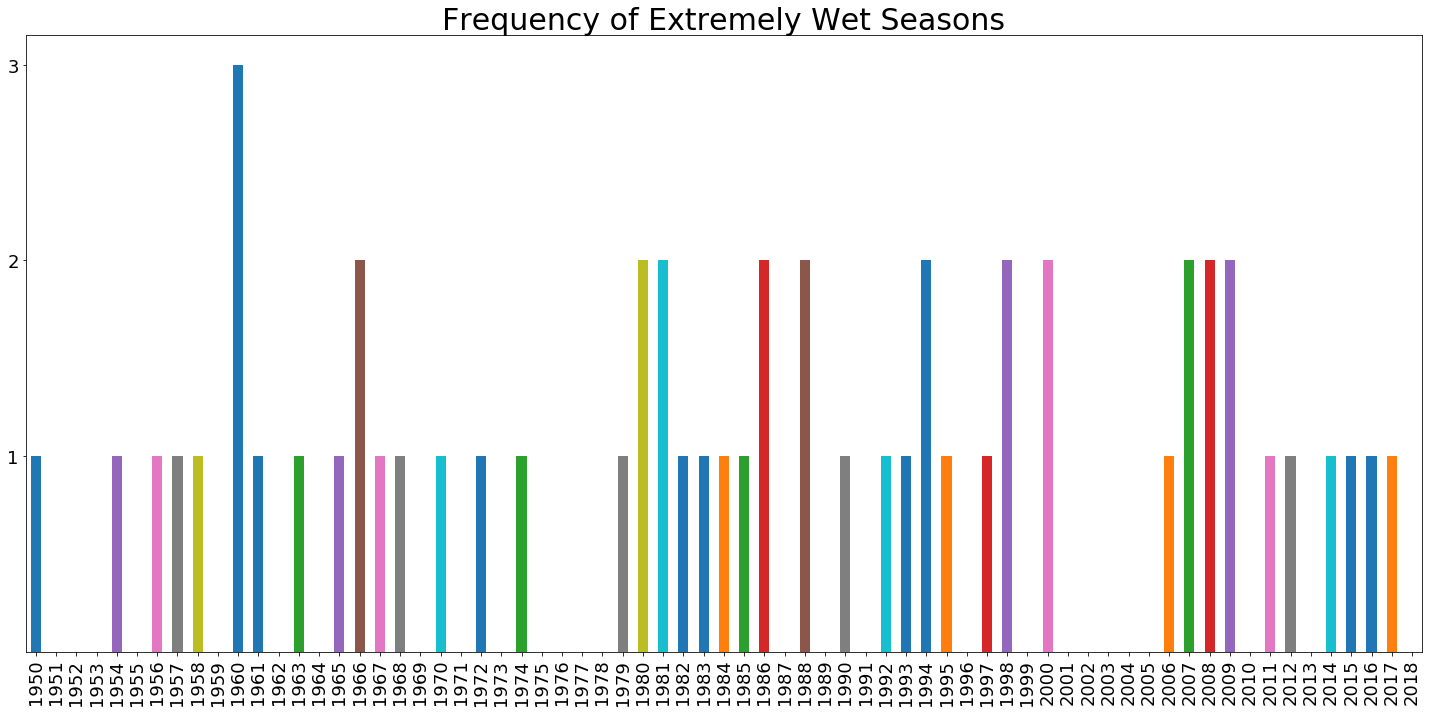

In [139]:
extremecount['wet'].plot(kind='bar')

plt.title('Frequency of Extremely Wet Seasons', fontsize = 30)
plt.legend().remove()
plt.tick_params(labelsize = 18)
plt.xlabel('')
plt.yticks(np.arange(1, 4, step=1.0))
plt.tight_layout()
#save it
os.chdir('E:\Thesis Images')
plt.savefig('WetSeasonFreq.jpeg', format = 'jpeg', dpi = 400)

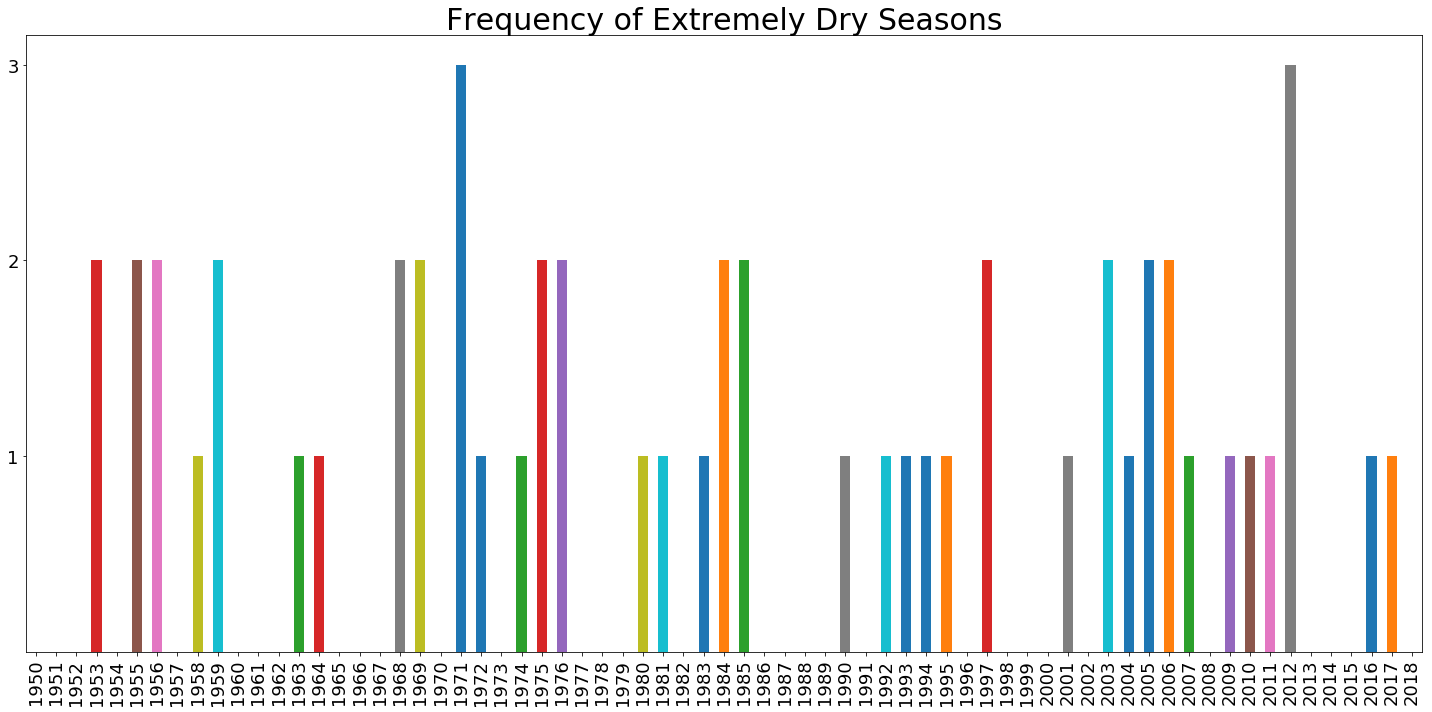

In [140]:
extremecount['dry'].plot(kind='bar', title = 'Frequency of Extremely Dry Seasons')

plt.title('Frequency of Extremely Dry Seasons', fontsize = 30)
plt.legend().remove()
plt.tick_params(labelsize = 18)
plt.xlabel('')
plt.yticks(np.arange(1, 4, step=1.0))
plt.tight_layout()
#save it
os.chdir('E:\Thesis Images')
plt.savefig('DrySeasonFreq.jpeg', format = 'jpeg', dpi = 400)

### Create new extreme dataframes to sample from

In [141]:
#cold
#extremecold = seasdif2.loc[(seasdif2.cold==1)]

#hot
#extremehot = seasdif2.loc[(seasdif2.warm==1)]

#dry
extremedry = seasdif2.loc[(seasdif2.dry==1)]

#wet
extremewet = seasdif2.loc[(seasdif2.wet==1)]

#cold-dry
#colddry = seasdif2.loc[(seasdif2.cold==1) & (seasdif2.dry==1)]

#cold-wet
#coldwet = seasdif2.loc[(seasdif2.cold==1) & (seasdif2.wet ==1)]

#hot-dry
#hotdry = seasdif2.loc[(seasdif2.warm==1) & (seasdif2.dry ==1)]

#hot-wet
#hotwet = seasdif2.loc[(seasdif2.warm==1) & (seasdif2.wet ==1)]

#normal
normal = seasdif2.loc[(seasdif2.dry==0) & (seasdif2.wet==0)]

#extreme
extreme = seasdif2.loc[(seasdif2.dry==1) | (seasdif2.wet==1)]

#test 
extreme

rr          rain  wet  dry
Year Season                                   
1950 3       41.336739  22593.008732    1    0
1953 1      -41.604416 -21755.488961    0    1
     2      -26.468628 -14412.507353    0    1
1954 4       53.720329  29595.522059    1    0
1955 3      -22.167297 -12080.190487    0    1
     4      -29.034439 -15588.575597    0    1
1956 2      -20.827785 -11332.605009    0    1
     3       36.926666  20185.110294    1    0
     4      -20.210815 -10770.876379    0    1
1957 1       22.716461  13363.710258    1    0
1958 3       44.337105  24231.211857    1    0
     4      -19.864105 -10581.575597    0    1
1959 1      -31.008446 -15970.090523    0    1
     3      -25.559052 -13932.088925    0    1
1960 1       31.378738  18093.311821    1    0
     3       33.606880  18372.508732    1    0
     4       23.818123  13268.920496    1    0
1961 1       23.803833  13957.413383    1    0
1963 1      -48.767418 -25666.488961    0    1
     2       24.816719  13589.293428    1    0
1964 1      -60.462292 -32051.891304    0    1
1965 3       19.650475  10752.309513    1    0
1966 1       38.433502  21945.210258    1    0
     2       25.447670  13933.793428    1    0
1967 4       29.430031  16333.022059    1    0
1968 1      -26.821449 -13683.988961    0    1
     3      -22.487442 -12254.987362    0    1
     4       25.987541  14453.420496    1    0
1969 3      -28.428101 -15498.588925    0    1
     4      -32.362274 -17405.575597    0    1
...                ...           ...  ...  ...
2001 4      -33.008980 -17758.677160    0    1
2003 1      -35.716324 -18540.590523    0    1
     4      -33.370705 -17956.177160    0    1
2004 1      -32.253502 -16649.891304    0    1
2005 1      -21.541779 -10801.289742    0    1
     3      -26.069859 -14210.987362    0    1
2006 1      -50.233719 -26467.090523    0    1
     3      -33.492386 -18263.688534    0    1
     4       37.404396  20687.022059    1    0
2007 1       30.602173  17669.311821    1    0
     3       35.820435  19581.110294    1    0
     4      -44.270889 -23907.677160    0    1
2008 1       26.677643  15526.507133    1    0
     3       51.777214  28293.508732    1    0
2009 1      -20.475479 -10219.090523    0    1
     3       47.185265  25786.313419    1    0
     4       35.855675  19841.420496    1    0
2010 1      -41.995628 -21969.090523    0    1
2011 1      -34.903725 -18597.590523    0    1
     4       23.705635  -6693.376379    1    0
2012 1      -21.829468 -11537.488961    0    1
     2      -29.909966 -16598.706572    0    1
     3       41.549828  21935.313419    1    0
     4      -20.775909 -11659.376379    0    1
2014 1       83.372330  46481.811821    1    0
2015 2       22.661957  12412.793428    1    0
2016 1       93.068115  51775.710258    1    0
     4      -35.199455 -18954.677160    0    1
2017 1      -30.493423 -15688.891304    0    1
     3       20.493149  11212.411075    1    0

[110 rows x 4 columns]

**Get the index to re-index the dataframes**

In [142]:
#cold
#coldindex = extremecold.index.tolist()

#hot
#hotindex = extremehot.index.tolist()

#dry
dryindex = extremedry.index.tolist()

#wet
wetindex = extremewet.index.tolist()

#cold-dry
#colddryindex = colddry.index.tolist()

#cold-wet
#coldwetindex= coldwet.index.tolist()

#hot-dry
#hotdryindex = hotdry.index.tolist()

#hot-wet
#hotwetindex = hotwet.index.tolist()

#normal
normalindex = normal.index.tolist()

#extreme
extremeindex = extreme.index.tolist()

#test
extremeindex

[(1950L, '3'),
 (1953L, '1'),
 (1953L, '2'),
 (1954L, '4'),
 (1955L, '3'),
 (1955L, '4'),
 (1956L, '2'),
 (1956L, '3'),
 (1956L, '4'),
 (1957L, '1'),
 (1958L, '3'),
 (1958L, '4'),
 (1959L, '1'),
 (1959L, '3'),
 (1960L, '1'),
 (1960L, '3'),
 (1960L, '4'),
 (1961L, '1'),
 (1963L, '1'),
 (1963L, '2'),
 (1964L, '1'),
 (1965L, '3'),
 (1966L, '1'),
 (1966L, '2'),
 (1967L, '4'),
 (1968L, '1'),
 (1968L, '3'),
 (1968L, '4'),
 (1969L, '3'),
 (1969L, '4'),
 (1970L, '4'),
 (1971L, '1'),
 (1971L, '2'),
 (1971L, '4'),
 (1972L, '2'),
 (1972L, '4'),
 (1974L, '1'),
 (1974L, '2'),
 (1975L, '2'),
 (1975L, '3'),
 (1976L, '1'),
 (1976L, '3'),
 (1979L, '2'),
 (1980L, '1'),
 (1980L, '2'),
 (1980L, '4'),
 (1981L, '2'),
 (1981L, '3'),
 (1981L, '4'),
 (1982L, '4'),
 (1983L, '2'),
 (1983L, '3'),
 (1984L, '1'),
 (1984L, '2'),
 (1984L, '3'),
 (1985L, '1'),
 (1985L, '3'),
 (1985L, '4'),
 (1986L, '2'),
 (1986L, '3'),
 (1988L, '1'),
 (1988L, '3'),
 (1990L, '1'),
 (1990L, '2'),
 (1992L, '1'),
 (1992L, '2'),
 (1993L, '

**WARNING** You may need to comment out some lines of this if there are no full year combinations of data. Check this by examining the output of the code above, if all of the lists are blank for a certain combination of extremes, this code will not work, avoid this by commenting out the combination with a fully blank year. 

In [143]:
#cold
#extremecold = df2.loc[coldindex]

#hot
#extremehot = df2.loc[hotindex]

#dry
dry = df2.loc[dryindex]

#wet
wet = df2.loc[wetindex]

#cold-dry
#colddry = df2.loc[colddryindex]

#cold-wet
#coldwet = df2.loc[coldwetindex] #commented out for Oak Park as there is no coldwet combo

#hot-dry
#hotdry = df2.loc[hotdryindex]

#hot-wet
#hotwet = df2.loc[hotwetindex]

#nomal
normal = df2.loc[normalindex]

#extreme
extreme = df2.loc[extremeindex]

#test view
wet

latitude  longitude       time          rr    seasdif
Year Season                                                       
1950 3         51.125    -10.875 1950-06-30         NaN  41.336739
     3         51.125    -10.875 1950-07-31         NaN  41.336739
     3         51.125    -10.875 1950-08-31         NaN  41.336739
     3         51.125    -10.625 1950-06-30         NaN  41.336739
     3         51.125    -10.625 1950-07-31         NaN  41.336739
     3         51.125    -10.625 1950-08-31         NaN  41.336739
     3         51.125    -10.375 1950-06-30         NaN  41.336739
     3         51.125    -10.375 1950-07-31         NaN  41.336739
     3         51.125    -10.375 1950-08-31         NaN  41.336739
     3         51.125    -10.125 1950-06-30         NaN  41.336739
     3         51.125    -10.125 1950-07-31         NaN  41.336739
     3         51.125    -10.125 1950-08-31         NaN  41.336739
     3         51.125     -9.875 1950-06-30         NaN  41.336739
     3         51.125     -9.875 1950-07-31         NaN  41.336739
     3         51.125     -9.875 1950-08-31         NaN  41.336739
     3         51.125     -9.625 1950-06-30         NaN  41.336739
     3         51.125     -9.625 1950-07-31         NaN  41.336739
     3         51.125     -9.625 1950-08-31         NaN  41.336739
     3         51.125     -9.375 1950-06-30         NaN  41.336739
     3         51.125     -9.375 1950-07-31         NaN  41.336739
     3         51.125     -9.375 1950-08-31         NaN  41.336739
     3         51.125     -9.125 1950-06-30         NaN  41.336739
     3         51.125     -9.125 1950-07-31         NaN  41.336739
     3         51.125     -9.125 1950-08-31         NaN  41.336739
     3         51.125     -8.875 1950-06-30         NaN  41.336739
     3         51.125     -8.875 1950-07-31         NaN  41.336739
     3         51.125     -8.875 1950-08-31         NaN  41.336739
     3         51.125     -8.625 1950-06-30         NaN  41.336739
     3         51.125     -8.625 1950-07-31         NaN  41.336739
     3         51.125     -8.625 1950-08-31         NaN  41.336739
...               ...        ...        ...         ...        ...
2017 3         55.875     -7.375 2017-06-30         NaN  20.493149
     3         55.875     -7.375 2017-07-31         NaN  20.493149
     3         55.875     -7.375 2017-08-31         NaN  20.493149
     3         55.875     -7.125 2017-06-30         NaN  20.493149
     3         55.875     -7.125 2017-07-31         NaN  20.493149
     3         55.875     -7.125 2017-08-31         NaN  20.493149
     3         55.875     -6.875 2017-06-30         NaN  20.493149
     3         55.875     -6.875 2017-07-31         NaN  20.493149
     3         55.875     -6.875 2017-08-31         NaN  20.493149
     3         55.875     -6.625 2017-06-30         NaN  20.493149
     3         55.875     -6.625 2017-07-31         NaN  20.493149
     3         55.875     -6.625 2017-08-31         NaN  20.493149
     3         55.875     -6.375 2017-06-30         NaN  20.493149
     3         55.875     -6.375 2017-07-31         NaN  20.493149
     3         55.875     -6.375 2017-08-31         NaN  20.493149
     3         55.875     -6.125 2017-06-30  102.200005  20.493149
     3         55.875     -6.125 2017-07-31  122.500000  20.493149
     3         55.875     -6.125 2017-08-31  162.800003  20.493149
     3         55.875     -5.875 2017-06-30         NaN  20.493149
     3         55.875     -5.875 2017-07-31         NaN  20.493149
     3         55.875     -5.875 2017-08-31         NaN  20.493149
     3         55.875     -5.625 2017-06-30  108.200005  20.493149
     3         55.875     -5.625 2017-07-31  113.400002  20.493149
     3         55.875     -5.625 2017-08-31  149.199997  20.493149
     3         55.875     -5.375 2017-06-30  112.900002  20.493149
     3         55.875     -5.375 2017-07-31  111.300003  20.493149
     3         55.875     -5.375 2017-08-31  146.300003  20.

### Resample the data and create a new sequence

In [144]:
df3 = df2
df3.head()

latitude  longitude       time  rr    seasdif
Year Season                                               
1950 1         51.125    -10.875 1950-01-31 NaN  -3.716682
     1         51.125    -10.875 1950-02-28 NaN  -3.716682
     2         51.125    -10.875 1950-03-31 NaN -16.306358
     2         51.125    -10.875 1950-04-30 NaN -16.306358
     2         51.125    -10.875 1950-05-31 NaN -16.306358

### Separate years into seasons for each extreme variable

In [216]:
#Cold years
#coldsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in coldindex: 
#    coldsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
#coldsample

#hot years
#hotsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in hotindex: 
#    hotsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#dry years
drysample = [[],[],[],[]] #empty list of lists
for (yr,se) in dryindex: 
    drysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#wet years
wetsample = [[],[],[],[]] #empty list of lists
for (yr,se) in wetindex: 
    wetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#cold-dry years
#colddrysample = [[],[],[],[]] #empty list of lists
#for (yr,se) in colddryindex: 
   # colddrysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#hot-dry years
#hotdrysample = [[],[],[],[]] #empty list of lists
#for (yr,se) in hotdryindex: 
    #hotdrysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#hot-wet years
#hotwetsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in hotwetindex: 
    #hotwetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#cold-wet years
#coldwetsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in coldwetindex: 
    #coldwetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#normal years
normalsample = [[],[],[],[]] #empty list of lists
for (yr,se) in normalindex: 
    normalsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#extreme years
extremesample = [[],[],[],[]] #empty list of lists
for (yr,se) in extremeindex: 
    extremesample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#test
wetsample

[[1957L,
  1960L,
  1961L,
  1966L,
  1974L,
  1980L,
  1984L,
  1988L,
  1990L,
  1994L,
  1995L,
  2000L,
  2007L,
  2008L,
  2014L,
  2016L],
 [1963L, 1966L, 1972L, 1979L, 1981L, 1983L, 1986L, 1992L, 1993L, 1994L, 2015L],
 [1950L,
  1956L,
  1958L,
  1960L,
  1965L,
  1985L,
  1986L,
  1988L,
  1997L,
  1998L,
  2007L,
  2008L,
  2009L,
  2012L,
  2017L],
 [1954L,
  1960L,
  1967L,
  1968L,
  1970L,
  1980L,
  1981L,
  1982L,
  1998L,
  2000L,
  2006L,
  2009L,
  2011L]]

At this point you can check if there's enough data to work with, and if the sampling is correct by checking these seasons with met eireann https://www.met.ie/climate/past-weather-statements (click archive at the top for older ones) - the brackets above represent seasons, first brackets are winter, spring, summer, autumn.

### Check if extreme indices have enough data to sample from

Checks the data to see if there are enough extreme years and prints an error otherwise - if there are no errors you can assume there is at least one full year of data for each extreme type.

If there is an error - you will not be able to generate that variable (tends to happen for short datasets and combinations of extremes (cold/wet, warm/dry etc). 

To overcome this you can change your threshold for extremes (quantiles) or find longer data. You can also comment out the variables in the code below if there is not enough data.

In [146]:
#cold years 
#cold_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldseq = [] #blank list
#try:
#    for yrlist in coldsample: 
#        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
#        cold_ctr += 1 # increment cold_ctr variable by 1
#        coldseq += [(ran_yr[0], cold_ctr)] #populate coldseq with a random year and a random season (in order)
#except:
#    print('coldseq (cold extremes) does not have enough extreme data for a full year, it contains: ' + str(coldsample))

################################################################################################################################
#hot years 
#hot_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotseq = [] #blank list
#try:    
#    for yrlist in hotsample: 
#        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
#        hot_ctr += 1 # increment counter variable by 1
#        hotseq += [(ran_yr[0], hot_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
#    print('hotseq (hot extremes) does not have enough extreme data for a full year, it contains: ' + str(hotsample))

################################################################################################################################
#dry years
dry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
dryseq = [] #blank list
try:
    for yrlist in drysample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        dry_ctr += 1 # increment counter variable by 1
        dryseq += [(ran_yr[0], dry_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('dryseq (dry extremes) does not have enough extreme data for a full year, it contains: '  + str(drysample))

################################################################################################################################
#wet years
wet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
wetseq = [] #blank list
try:
    for yrlist in wetsample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        wet_ctr += 1 # increment counter variable by 1
        wetseq += [(ran_yr[0], wet_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('wetseq (wet extremes) does not have enough extreme data for a full year, it contains: '  + str(wetsample))

################################################################################################################################
#cold-dry years
#colddry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#colddryseq = [] #blank list
#try:
    #for yrlist in colddrysample: 
       # ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #colddry_ctr += 1 # increment counter variable by 1
        #colddryseq += [(ran_yr[0], colddry_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('colddryseq (colddry extremes) does not have enough extreme data for a full year, it contains: '  + str(colddrysample))
################################################################################################################################
#hot-dry years
#hotdry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotdryseq = [] #blank list
#try:
    #for yrlist in hotdrysample: 
       # ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #hotdry_ctr += 1 # increment counter variable by 1
        #hotdryseq += [(ran_yr[0], hotdry_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('hotdryseq (hotdry extremes) does not have enough extreme data for a full year, it contains: '  + str(hotdrysample))

################################################################################################################################
#cold-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list
#try:
    #for yrlist in coldwetsample: 
        #ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #coldwet_ctr += 1 # increment counter variable by 1
        #coldwetseq += [(ran_yr[0], coldwet_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('coldwetseq (coldwet extremes) does not have enough extreme data for a full year, it contains: ' + str(coldwetsample))
################################################################################################################################
#hot-wet years
#hotwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotwetseq = [] #blank list
#try:
    #for yrlist in hotwetsample: 
        #ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #hotwet_ctr += 1 # increment counter variable by 1
        #hotwetseq += [(ran_yr[0], hotwet_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('hotwetseq (hotwet extremes) does not have enough extreme data for a full year, it contains: ' + str(hotwetsample))
    
################################################################################################################################
#Normal years
normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
normalseq = [] #blank list
try:
    for yrlist in normalsample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        normal_ctr += 1 # increment counter variable by 1
        normalseq += [(ran_yr[0], normal_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('normalseq (non-extreme data) does not have enough data for a full year, it contains: ' + str(normalsample))
    
################################################################################################################################
#extreme years
extreme_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
extremeseq = [] #blank list
try:
    for yrlist in extremesample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        extreme_ctr += 1 # increment counter variable by 1
        extremeseq += [(ran_yr[0], extreme_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('extremeseq (extreme data) does not have enough data for a full year, it contains: ' + str(extremesample))

If the output above says there is not enough extreme data for a full year - omit the extreme from your analysis (you will hit errors which will prevent you from using it anyway)

## Annual resampling

In [147]:
#normal years 
normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
normalseq = [] #blank list

#extreme years
extreme_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
extremeseq = [] #blank list

#cold years 
#cold_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldseq = [] #blank list

#hot years 
#hot_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotseq = [] #blank list

#dry years
dry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
dryseq = [] #blank list

#wet years
wet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
wetseq = [] #blank list

#cold-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list

#cold-dry years
#colddry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#colddryseq = [] #blank list

#warm-dry years
#hotdry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotdryseq = [] #blank list

#warm-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list

Comment/uncomment sections here to alter the way you choose data

## Seasonal Resampling

First - convert the annual dataframes into seasonal dataframes

In [148]:
#normaldata
normalwinter = normalsample[0]
normalspring = normalsample[1]
normalsummer = normalsample[2]
normalautumn = normalsample[3]

#extreme data
extremewinter = extremesample[0]
extremespring = extremesample[1]
extremesummer = extremesample[2]
extremeautumn = extremesample[3]

#cold data
#coldwinter = coldsample[0]
#coldspring = coldsample[1]
#coldsummer = coldsample[2]
#coldautumn = coldsample[3]

#hot data
#hotwinter = hotsample[0]
#hotspring = hotsample[1]
#hotsummer = hotsample[2]
#hotautumn = hotsample[3]

#wet data
wetwinter = wetsample[0]
wetspring = wetsample[1]
wetsummer = wetsample[2]
wetautumn = wetsample[3]

#dry data
drywinter = drysample[0]
dryspring = drysample[1]
drysummer = drysample[2]
dryautumn = drysample[3]

#cold-dry data
#colddrywinter = colddrysample[0]
#colddryspring = colddrysample[1]
#colddrysummer = colddrysample[2]
#colddryautumn = colddrysample[3]

#hot-dry data
#hotdrywinter = hotdrysample[0]
#hotdryspring = hotdrysample[1]
#hotdrysummer = hotdrysample[2]
#hotdryautumn = hotdrysample[3]

#cold-wet data
#coldwetwinter = coldwetsample[0]
#coldwetspring = coldwetsample[1]
#coldwetsummer = coldwetsample[2]
#coldwetautumn = coldwetsample[3]

#hot-wet data
#hotwetwinter = hotwetsample[0]
#hotwetspring = hotwetsample[1]
#hotwetsummer = hotwetsample[2]
#hotwetautumn = hotwetsample[3]

### Define annual functions (for generating normal and extreme years)

In [149]:
def normalyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
    normalseq = [] #blank list
    for i in range (years): #change number here for number of years
        for yrlist in normalsample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            normal_ctr += 1 # increment cold_ctr variable by 1
            normalseq += [(ran_yr[0], normal_ctr)]
        for item in normalseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(normal.query("Year == %d and Season == '%d'" % item))
            normalseq = [] #reset coldseq to an empty list so it samples from a new random year
            normal_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4  

In [150]:
def extremeyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    extremeseq = [] #reset to an empty list so it samples from a new random year
    extreme_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4
    for i in range (years): #change number here for number of years
        for yrlist in extremesample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            extreme_ctr += 1 # increment counter variable by 1
            extremeseq += [(ran_yr[0], extreme_ctr)]
        for item in extremeseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(extreme.query("Year == %d and Season == '%d'" % item))
            extremeseq = [] #reset to an empty list so it samples from a new random year
            extreme_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4

In [44]:
def dryyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    dryseq = [] #reset to an empty list so it samples from a new random year
    dry_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4
    for i in range (years): #change number here for number of years
        for yrlist in drysample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            dry_ctr += 1 # increment counter variable by 1
            dryseq += [(ran_yr[0], dry_ctr)]
        for item in dryseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(dry.query("Year == %d and Season == '%d'" % item))
            dryseq = [] #reset to an empty list so it samples from a new random year
            dry_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4

In [151]:
def wetyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    wetseq = [] #reset to an empty list so it samples from a new random year
    wet_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4
    for i in range (years): #change number here for number of years
        for yrlist in wetsample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            wet_ctr += 1 # increment counter variable by 1
            wetseq += [(ran_yr[0], wet_ctr)]
        for item in wetseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(wet.query("Year == %d and Season == '%d'" % item))
            wetseq = [] #reset to an empty list so it samples from a new random year
            wet_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4

### Define seasonal functions

In [152]:
def futurewinter(projection, data, input_list):
    '''function takes 3 arguments, projection is the dataframe you will write your data to, data is the dataset you are sampling
    from (e.g. extreme contains all extreme data), and input_list is the list of years for your variable 
    (e.g. extremewinter contains all years with extreme winters).'''
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 1)] #takes the random year and appends number 1 (to denote winter)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [153]:
def futurespring(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 2)] #takes the random year and appends number 2 (to denote spring)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [154]:
def futuresummer(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 3)] #takes the random year and appends number 3 (to denote summer)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [155]:
def futureautumn(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 4)] #takes the random year and appends number 4 (to denote autumn)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

## All possible year and season combinations

To generate your final sequence you can choose combinations of years and seasons, i.e. you can have 5 'normal' years followed by a cold winter, a wet spring, a dry summer and a wet autumn. Do this by copying and pasting the relevant code

**WARNING: IF SECTIONS OF CODE DON'T RUN IT IS DUE TO LACK OF DATA COMBINATIONS**

In [156]:
projection = [] #sample blank dataframe so code runs

In [157]:
#normal year
normalyear(projection, 1) #one normal year for example

In [158]:
projection

[             latitude  longitude       time          rr   seasdif
 Year Season                                                      
 1954 1         51.125    -10.875 1953-12-31         NaN -9.296906
      1         51.125    -10.875 1954-01-31         NaN -9.296906
      1         51.125    -10.875 1954-02-28         NaN -9.296906
      1         51.125    -10.625 1953-12-31         NaN -9.296906
      1         51.125    -10.625 1954-01-31         NaN -9.296906
      1         51.125    -10.625 1954-02-28         NaN -9.296906
      1         51.125    -10.375 1953-12-31         NaN -9.296906
      1         51.125    -10.375 1954-01-31         NaN -9.296906
      1         51.125    -10.375 1954-02-28         NaN -9.296906
      1         51.125    -10.125 1953-12-31         NaN -9.296906
      1         51.125    -10.125 1954-01-31         NaN -9.296906
      1         51.125    -10.125 1954-02-28         NaN -9.296906
      1         51.125     -9.875 1953-12-31         NaN -9.29

In [159]:
#extreme year
extremeyear(projection, 1) #one extreme year

In [160]:
#dry year
dryyear(projection, 1)

**Winter Functions**

In [161]:
#normal winter
futurewinter(projection, normal, normalwinter)

In [162]:
#extreme winter
futurewinter(projection, extreme, extremewinter)

In [163]:
#wet winter
futurewinter(projection, extremewet, wetwinter)

In [164]:
#dry winter
futurewinter(projection, extremedry, drywinter)

In [165]:
#hot winter
#futurewinter(projection, extremehot, hotwinter)

In [166]:
#cold winter
#futurewinter(projection, extremecold, coldwinter)

In [167]:
#hot-wet winter
#futurewinter(projection, hotwet, hotwetwinter)

In [168]:
#hot-dry winter
#futurewinter(projection, hotdry, hotdrywinter)

In [169]:
#cold-wet winter
#futurewinter(projection, coldwet, coldwetwinter)

In [170]:
#cold-dry winter
#futurewinter(projection, colddry, colddrywinter)

**Spring Functions**

In [171]:
#normal spring
futurespring(projection, normal, normalspring)

In [172]:
#extreme spring
futurespring(projection, extreme, extremespring)

In [173]:
#wet spring
futurespring(projection, extremewet, wetspring)

In [174]:
#dry spring
futurespring(projection, extremedry, dryspring)

In [175]:
#hot spring
#futurespring(projection, extremehot, hotspring)

In [176]:
#cold spring
#futurespring(projection, extremecold, coldspring)

In [177]:
#hot-wet spring
#futurespring(projection, hotwet, hotwetspring)

In [178]:
#hot-dry spring
#futurespring(projection, hotdry, hotdryspring)

In [179]:
#cold-wet spring
#futurespring(projection, hotdry, hotdryspring)

In [180]:
#cold-dry spring
#futurespring(projection,colddry, colddryspring)

**Summer Functions**

In [181]:
#normal summer
futuresummer(projection, normal, normalsummer)

In [182]:
#extreme summer
futuresummer(projection, extreme, extremesummer)

In [183]:
#wet summer
futuresummer(projection, extremewet, wetsummer)

In [184]:
#dry summer
futuresummer(projection, extremedry, drysummer)

In [185]:
#hot summer
#futuresummer(projection, extremehot, hotsummer)

In [186]:
#cold summer
#futuresummer(projection, extremecold, coldsummer)

In [187]:
#hot-wet summer
#futuresummer(projection, hotwet, hotwetsummer)

In [188]:
#hot-dry summer
#futuresummer(projection, hotdry, hotdrysummer)

In [189]:
#cold-wet summer
#futuresummer(projection, coldwet, coldwetsummer)

In [190]:
#cold-dry summer
#futuresummer(projection, colddry, colddrysummer)

**Autumn Functions**

In [191]:
#normal autumn
futureautumn(projection, normal, normalautumn)

In [192]:
#extreme autumn
futureautumn(projection, extreme, extremeautumn)

In [193]:
#wet autumn
futureautumn(projection, extremewet, wetautumn)

In [194]:
#dry autumn
futureautumn(projection, extremedry, dryautumn)

In [195]:
#hot autumn
#futureautumn(projection, extremehot, hotautumn)

In [196]:
#cold autumn
#futureautumn(projection, extremecold, coldautumn)

In [197]:
#hot-wet autumn
#futureautumn(projection, hotwet, hotwetautumn)

In [198]:
#hot-dry autumn
#futureautumn(projection, hotdry, hotdryautumn)

In [199]:
#cold-wet autumn
#futureautumn(projection, coldwet, coldwetautumn)

In [200]:
#cold-dry autumn
#futureautumn(projection, colddry, colddryautumn)

## Generate your new sequence

Simply copy and paste the functions above (following seasonal sequence) to generate your future climate. The example below shows 2 'normal years', followed by 2 'extreme' years, a cold winter, wet spring, hot/dry summer, and hot/wet autumn. 

### First, The spin-up dataframe

In [201]:
future = [] #blank dataframe (should be the first argument in all following functions)

In [202]:
spinupdf = df2
spinupdf.head()

latitude  longitude       time  rr    seasdif
Year Season                                               
1950 1         51.125    -10.875 1950-01-31 NaN  -3.716682
     1         51.125    -10.875 1950-02-28 NaN  -3.716682
     2         51.125    -10.875 1950-03-31 NaN -16.306358
     2         51.125    -10.875 1950-04-30 NaN -16.306358
     2         51.125    -10.875 1950-05-31 NaN -16.306358

In [203]:
spinupdf = spinupdf.reset_index()

In [204]:
spinupdf = spinupdf.set_index(['time'])
spinupdf.head()

,Year,Season,latitude,longitude,rr,seasdif
time,,,,,,
1950-01-31,1950,1,51.125,-10.875,NaN,-3.716682
1950-02-28,1950,1,51.125,-10.875,NaN,-3.716682
1950-03-31,1950,2,51.125,-10.875,NaN,-16.306358
1950-04-30,1950,2,51.125,-10.875,NaN,-16.306358
1950-05-31,1950,2,51.125,-10.875,NaN,-16.306358


In [205]:
spinup = spinupdf.loc['1970-01-31':'1999-12-31'] #extract your years here
spinup.tail(n=100)

,Year,Season,latitude,longitude,rr,seasdif
time,,,,,,
1991-09-30,1991,4,55.875,-5.125,NaN,4.096695
1991-10-31,1991,4,55.875,-5.125,NaN,4.096695
1991-11-30,1991,4,55.875,-5.125,NaN,4.096695
1991-12-31,1992,1,55.875,-5.125,NaN,-28.149467
1992-01-31,1992,1,55.875,-5.125,NaN,-28.149467
1992-02-29,1992,1,55.875,-5.125,NaN,-28.149467
1992-03-31,1992,2,55.875,-5.125,NaN,25.537598
1992-04-30,1992,2,55.875,-5.125,NaN,25.537598
1992-05-31,1992,2,55.875,-5.125,NaN,25.537598


In [206]:
spinup = spinup.reset_index() #reindex the df so TECHNICALLY you should be able to append your data after this data?
spinup.head()

,time,Year,Season,latitude,longitude,rr,seasdif
0,1970-01-31,1970,1,51.125,-10.875,NaN,9.137711
1,1970-02-28,1970,1,51.125,-10.875,NaN,9.137711
2,1970-03-31,1970,2,51.125,-10.875,NaN,-9.563683
3,1970-04-30,1970,2,51.125,-10.875,NaN,-9.563683
4,1970-05-31,1970,2,51.125,-10.875,NaN,-9.563683


In [207]:
spinup.tail()

,time,Year,Season,latitude,longitude,rr,seasdif
172795,1999-08-31,1999,3,55.875,-5.125,NaN,-10.335243
172796,1999-09-30,1999,4,55.875,-5.125,NaN,14.452187
172797,1999-10-31,1999,4,55.875,-5.125,NaN,14.452187
172798,1999-11-30,1999,4,55.875,-5.125,NaN,14.452187
172799,1999-12-31,2000,1,55.875,-5.125,NaN,36.509506


In [208]:
spinup.set_index(['latitude', 'longitude', 'time'], inplace=True)

In [209]:
#back to xarray dataset
spinup = spinup.to_xarray()
spinup

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 360)
Coordinates:
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
  * time       (time) datetime64[ns] 1970-01-31 1970-02-28 1970-03-31 ...
Data variables:
    Year       (latitude, longitude, time) int64 1970 1970 1970 1970 1970 ...
    Season     (latitude, longitude, time) object '1' '1' '2' '2' '2' '3' ...
    rr         (latitude, longitude, time) float32 nan nan nan nan nan nan ...
    seasdif    (latitude, longitude, time) float32 9.137711 9.137711 ...

## Now Generate your future run

this blank dataframe will create annual or seasonal sequences - make sure you respect the seasonal sequence if doing individual seasons! 

Choose what you want your future scenario to be and ONLY choose the ones you actually want, for example if you want 10 hot years then just run the hotyear command with a 10 in it

In [210]:
future = [] #blank dataframe (should be the first argument in all following functions)

In [211]:
#wet year
wetyear(future, 10) 

In [104]:
#dry year
dryyear(future, 10) 

In [93]:
#normal year
#normalyear(future, 10) #change number here for number of years

In [94]:
#extreme year
#extremeyear(future, 1) #change number here for number of years

In [95]:
#cold winter
#futurewinter(future, extremecold, coldwinter)

In [96]:
#wet spring
#futurespring(future, extremewet, wetspring)

In [97]:
#hot-dry summer
#futuresummer(future, hotdry, hotdrysummer)

In [98]:
#hot-wet autumn
#futureautumn(future, hotwet, hotwetautumn)

In [212]:
future = pd.concat(future) #concatenate the dataframe and print for inspection
future.head()

latitude  longitude       time  rr    seasdif
Year Season                                               
1980 1         51.125    -10.875 1979-12-31 NaN  20.001633
     1         51.125    -10.875 1980-01-31 NaN  20.001633
     1         51.125    -10.875 1980-02-29 NaN  20.001633
     1         51.125    -10.625 1979-12-31 NaN  20.001633
     1         51.125    -10.625 1980-01-31 NaN  20.001633

In [213]:
future = future.rename(columns={"time":"date"})

In [215]:
#write the future data to excel if you want to use Mike's EurasiaUtilsGUI thing
futureXLS = future.to_excel('E:/Data/EObs/10WetYears_Precip.xlsx') # write to Excel

In [117]:
future = future.rename(columns={"time":"olddate"})

## Creating Future Data

This section allows for the generation of a new NetCDF file from the spinup and future periods, by creating a dummy date variable from 2000-2010 for the future data, and joining this to the real data from 1970-1999

In [122]:
future = future.reset_index()
future.head()

,Year,Season,latitude,longitude,olddate,rr,seasdif,time
0,1953,1,51.125,-10.875,1952-12-31,NaN,-41.604416,NaT
1,1953,1,51.125,-10.875,1953-01-31,NaN,-41.604416,NaT
2,1953,1,51.125,-10.875,1953-02-28,NaN,-41.604416,NaT
3,1953,1,51.125,-10.625,1952-12-31,NaN,-41.604416,NaT
4,1953,1,51.125,-10.625,1953-01-31,NaN,-41.604416,NaT


In [123]:
'''this excel file contains dates on a seasonal basis for each lat/lon combo 
from 2000-2010 to allow for merging with the 1970-1999 EObs past data'''

df = pd.read_excel('E:/Vault/Dates2000-2010.xlsx')

In [124]:
df.head()

,date
0,1999-12-31
1,2000-01-31
2,2000-02-28
3,1999-12-31
4,2000-01-31


In [125]:
#add this to the future data as the 'time' column
future['time'] = df['date']

In [126]:
future.head()

,Year,Season,latitude,longitude,olddate,rr,seasdif,time
0,1953,1,51.125,-10.875,1952-12-31,NaN,-41.604416,1999-12-31
1,1953,1,51.125,-10.875,1953-01-31,NaN,-41.604416,2000-01-31
2,1953,1,51.125,-10.875,1953-02-28,NaN,-41.604416,2000-02-28
3,1953,1,51.125,-10.625,1952-12-31,NaN,-41.604416,1999-12-31
4,1953,1,51.125,-10.625,1953-01-31,NaN,-41.604416,2000-01-31


####  Joining spinup and new df

In [127]:
#the spinup df goes to Nov 1999, the future df picks up in December 1999

spinup = spinupdf.loc['1970-01-31':'1999-11-30'] #extract your years here
spinup.tail(n=100)

,Year,Season,latitude,longitude,rr,seasdif
time,,,,,,
1991-08-31,1991,3,55.875,-5.125,NaN,-9.078835
1991-09-30,1991,4,55.875,-5.125,NaN,4.096695
1991-10-31,1991,4,55.875,-5.125,NaN,4.096695
1991-11-30,1991,4,55.875,-5.125,NaN,4.096695
1991-12-31,1992,1,55.875,-5.125,NaN,-28.149467
1992-01-31,1992,1,55.875,-5.125,NaN,-28.149467
1992-02-29,1992,1,55.875,-5.125,NaN,-28.149467
1992-03-31,1992,2,55.875,-5.125,NaN,25.537598
1992-04-30,1992,2,55.875,-5.125,NaN,25.537598


In [128]:
#reset the index 
spinup = spinup.reset_index()

spinup

,time,Year,Season,latitude,longitude,rr,seasdif
0,1970-01-31,1970,1,51.125,-10.875,NaN,9.137711
1,1970-02-28,1970,1,51.125,-10.875,NaN,9.137711
2,1970-03-31,1970,2,51.125,-10.875,NaN,-9.563683
3,1970-04-30,1970,2,51.125,-10.875,NaN,-9.563683
4,1970-05-31,1970,2,51.125,-10.875,NaN,-9.563683
5,1970-06-30,1970,3,51.125,-10.875,NaN,-4.711433
6,1970-07-31,1970,3,51.125,-10.875,NaN,-4.711433
7,1970-08-31,1970,3,51.125,-10.875,NaN,-4.711433
8,1970-09-30,1970,4,51.125,-10.875,NaN,22.938637
9,1970-10-31,1970,4,51.125,-10.875,NaN,22.938637


In [129]:
#set the index so the xarray dataset has coordinates
spinup = spinup.set_index(['latitude', 'longitude', 'time'])
spinup.head()

Year Season  rr   seasdif
latitude longitude time                                 
51.125   -10.875   1970-01-31  1970      1 NaN  9.137711
                   1970-02-28  1970      1 NaN  9.137711
                   1970-03-31  1970      2 NaN -9.563683
                   1970-04-30  1970      2 NaN -9.563683
                   1970-05-31  1970      2 NaN -9.563683

In [130]:
future = future.reset_index()

In [131]:
#set the index so the xarray dataset has coordinates
future = future.set_index(['latitude', 'longitude', 'time'])
future.head()

index  Year Season    olddate  rr    seasdif
latitude longitude time                                                    
51.125   -10.875   1999-12-31      0  1953      1 1952-12-31 NaN -41.604416
                   2000-01-31      1  1953      1 1953-01-31 NaN -41.604416
                   2000-02-28      2  1953      1 1953-02-28 NaN -41.604416
         -10.625   1999-12-31      3  1953      1 1952-12-31 NaN -41.604416
                   2000-01-31      4  1953      1 1953-01-31 NaN -41.604416

In [132]:
#convert to xarray dataset
spinupds = spinup.to_xarray()

In [133]:
#convert to xarray dataset
futureds = future.to_xarray()

In [134]:
#merge the datasets using xarray merge command
merged = spinupds.merge(futureds)

In [135]:
#have a look at the new dataset
merged

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 479)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-31 1970-02-28 1970-03-31 ...
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
Data variables:
    Year       (latitude, longitude, time) float64 1.97e+03 1.97e+03 ...
    Season     (latitude, longitude, time) object '1' '1' '2' '2' '2' '3' ...
    rr         (latitude, longitude, time) float32 nan nan nan nan nan nan ...
    seasdif    (latitude, longitude, time) float32 9.137711 9.137711 ...
    index      (latitude, longitude, time) float64 nan nan nan nan nan nan ...
    olddate    (latitude, longitude, time) datetime64[ns] NaT NaT NaT NaT ...

In [136]:
#write the data to a netcdf file for running the model with
merged.to_netcdf('E:/Data/EObs/10DryYears.nc')

In [482]:
future.set_index(['latitude', 'longitude','Season','time'], inplace=True)
future.head()

Year  rr   seasdif
latitude longitude time       Season                    
51.125   -10.875   1997-12-31 1       1998 NaN  4.948517
                   1998-01-31 1       1998 NaN  4.948517
                   1998-02-28 1       1998 NaN  4.948517
         -10.625   1997-12-31 1       1998 NaN  4.948517
                   1998-01-31 1       1998 NaN  4.948517

In [483]:
xarray.Dataset.from_dataframe(future)

<xarray.Dataset>
Dimensions:    (Season: 4, latitude: 20, longitude: 24, time: 24)
Coordinates:
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
  * time       (time) datetime64[ns] 1954-03-31 1954-04-30 1954-05-31 ...
  * Season     (Season) int64 1 2 3 4
Data variables:
    Year       (latitude, longitude, time, Season) float64 nan 1.954e+03 nan ...
    rr         (latitude, longitude, time, Season) float32 nan nan nan nan ...
    seasdif    (latitude, longitude, time, Season) float32 nan 5.1753235 nan ...

In [446]:
#back to xarray dataset
future = future.to_xarray()
future

<xarray.Dataset>
Dimensions:    (id: 4, latitude: 20, longitude: 24, time: 24)
Coordinates:
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
  * time       (time) datetime64[ns] 1953-09-30 1953-10-31 1953-11-30 ...
  * id         (id) object '0       2014-12-31\n1       2015-01-31\n2       2015-02-28\n3       2014-12-31\n4       2015-01-31\n5       2015-02-28\n6       2014-12-31\n7       2015-01-31\n8       2015-02-28\n9       2014-12-31\n10      2015-01-31\n11      2015-02-28\n12      2014-12-31\n13      2015-01-31\n14      2015-02-28\n15      2014-12-31\n16      2015-01-31\n17      2015-02-28\n18      2014-12-31\n19      2015-01-31\n20      2015-02-28\n21      2014-12-31\n22      2015-01-31\n23      2015-02-28\n24      2014-12-31\n25      2015-01-31\n26      2015-02-28\n27      2014-12-31\n28      2015-01-31\n29      2015-02-28\n           ...    \n11490   1954-09-30\n11491

In [ ]:
#for this you might need to ensure it takes entire years instead of seasons. 

#try running the seasonal code and seeing if this helps? 

In [447]:
#convert to netcdf
future.to_netcdf('E:/Data/EObs/futuretestRain.nc', engine='scipy')

In [ ]:
temp1 = (future.Temperature-273).isel(Time=18)
temp1.plot()

In [ ]:
future[['meantp', 'rain']].plot()

In [ ]:
os.chdir('E:\PhD\Data\Block Resampling')
future.to_csv('future.csv', sep = ',')

In [ ]:
pd.__version__